In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR

directory = r'D:\Research Methodology\Dataset Baru'

import os
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ModuleNotFoundError: No module named 'seaborn'

In [3]:
# Load the three files - create a dataframe for each
temperatures = pd.read_csv(r'D:\Research Methodology\Dataset Baru\1- temperature-anomaly.csv')
co_emissions = pd.read_csv(r'D:\Research Methodology\Dataset Baru\2- annual-co-emissions-by-region.csv')
emissions_pc = pd.read_csv(r'D:\Research Methodology\Dataset Baru\3- co-emissions-per-capita.csv') # per capita

In [4]:
co_emissions.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [5]:
co_emissions.dtypes
co_emissions.count

<bound method DataFrame.count of             Entity Code  Year  Annual CO₂ emissions
0      Afghanistan  AFG  1949               14656.0
1      Afghanistan  AFG  1950               84272.0
2      Afghanistan  AFG  1951               91600.0
3      Afghanistan  AFG  1952               91600.0
4      Afghanistan  AFG  1953              106256.0
...            ...  ...   ...                   ...
30303     Zimbabwe  ZWE  2018            10714598.0
30304     Zimbabwe  ZWE  2019             9775428.0
30305     Zimbabwe  ZWE  2020             7849639.0
30306     Zimbabwe  ZWE  2021             8396158.0
30307     Zimbabwe  ZWE  2022             8855981.0

[30308 rows x 4 columns]>

In [6]:
co_emissions.describe()

,Year,Annual CO₂ emissions
count,30308.000000,3.030800e+04
mean,1940.191336,3.912722e+08
std,65.510232,1.855825e+09
min,1750.000000,0.000000e+00
25%,1902.000000,1.832000e+05
50%,1959.000000,3.856092e+06
75%,1991.000000,4.727752e+07
max,2022.000000,3.714979e+10


In [7]:
print(co_emissions.isnull().sum())

Entity                     0
Code                    6151
Year                       0
Annual CO₂ emissions       0
dtype: int64


In [8]:
print(co_emissions.describe())

               Year  Annual CO₂ emissions
count  30308.000000          3.030800e+04
mean    1940.191336          3.912722e+08
std       65.510232          1.855825e+09
min     1750.000000          0.000000e+00
25%     1902.000000          1.832000e+05
50%     1959.000000          3.856092e+06
75%     1991.000000          4.727752e+07
max     2022.000000          3.714979e+10


In [9]:
# Renaming columns
co_emissions = co_emissions.rename(columns={"Annual CO₂ emissions": "Emissions"})
co_emissions.head(5)

,Entity,Code,Year,Emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [10]:
# Find the countries with maximum values
# Find highest emission values
highest_coemissions = co_emissions.sort_values('Emissions', ascending=False).head(20)
highest_coemissions

,Entity,Code,Year,Emissions
30041,World,OWID_WRL,2022,3.714979e+10
30038,World,OWID_WRL,2019,3.704010e+10
30040,World,OWID_WRL,2021,3.681654e+10
30037,World,OWID_WRL,2018,3.676694e+10
30036,World,OWID_WRL,2017,3.602546e+10
30033,World,OWID_WRL,2014,3.546620e+10
30034,World,OWID_WRL,2015,3.546321e+10
30035,World,OWID_WRL,2016,3.546003e+10
30032,World,OWID_WRL,2013,3.523247e+10
30039,World,OWID_WRL,2020,3.500774e+10


In [11]:
country_coemissions = co_emissions[co_emissions['Code'].isnull() == False]
num_entities_co = len(country_coemissions[["Entity"]].drop_duplicates())
print(f"Number of entities listed: {num_entities_co}")
print(country_coemissions["Entity"].unique())

Number of entities listed: 217
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'G

In [12]:
# Also remove world from countries
country_coemissions = country_coemissions[country_coemissions['Entity'] != 'World']
num_entities_co2 = len(country_coemissions[["Entity"]].drop_duplicates())
print(f"Number of entities listed: {num_entities_co2}")
print(country_coemissions["Entity"].unique())

Number of entities listed: 216
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'G

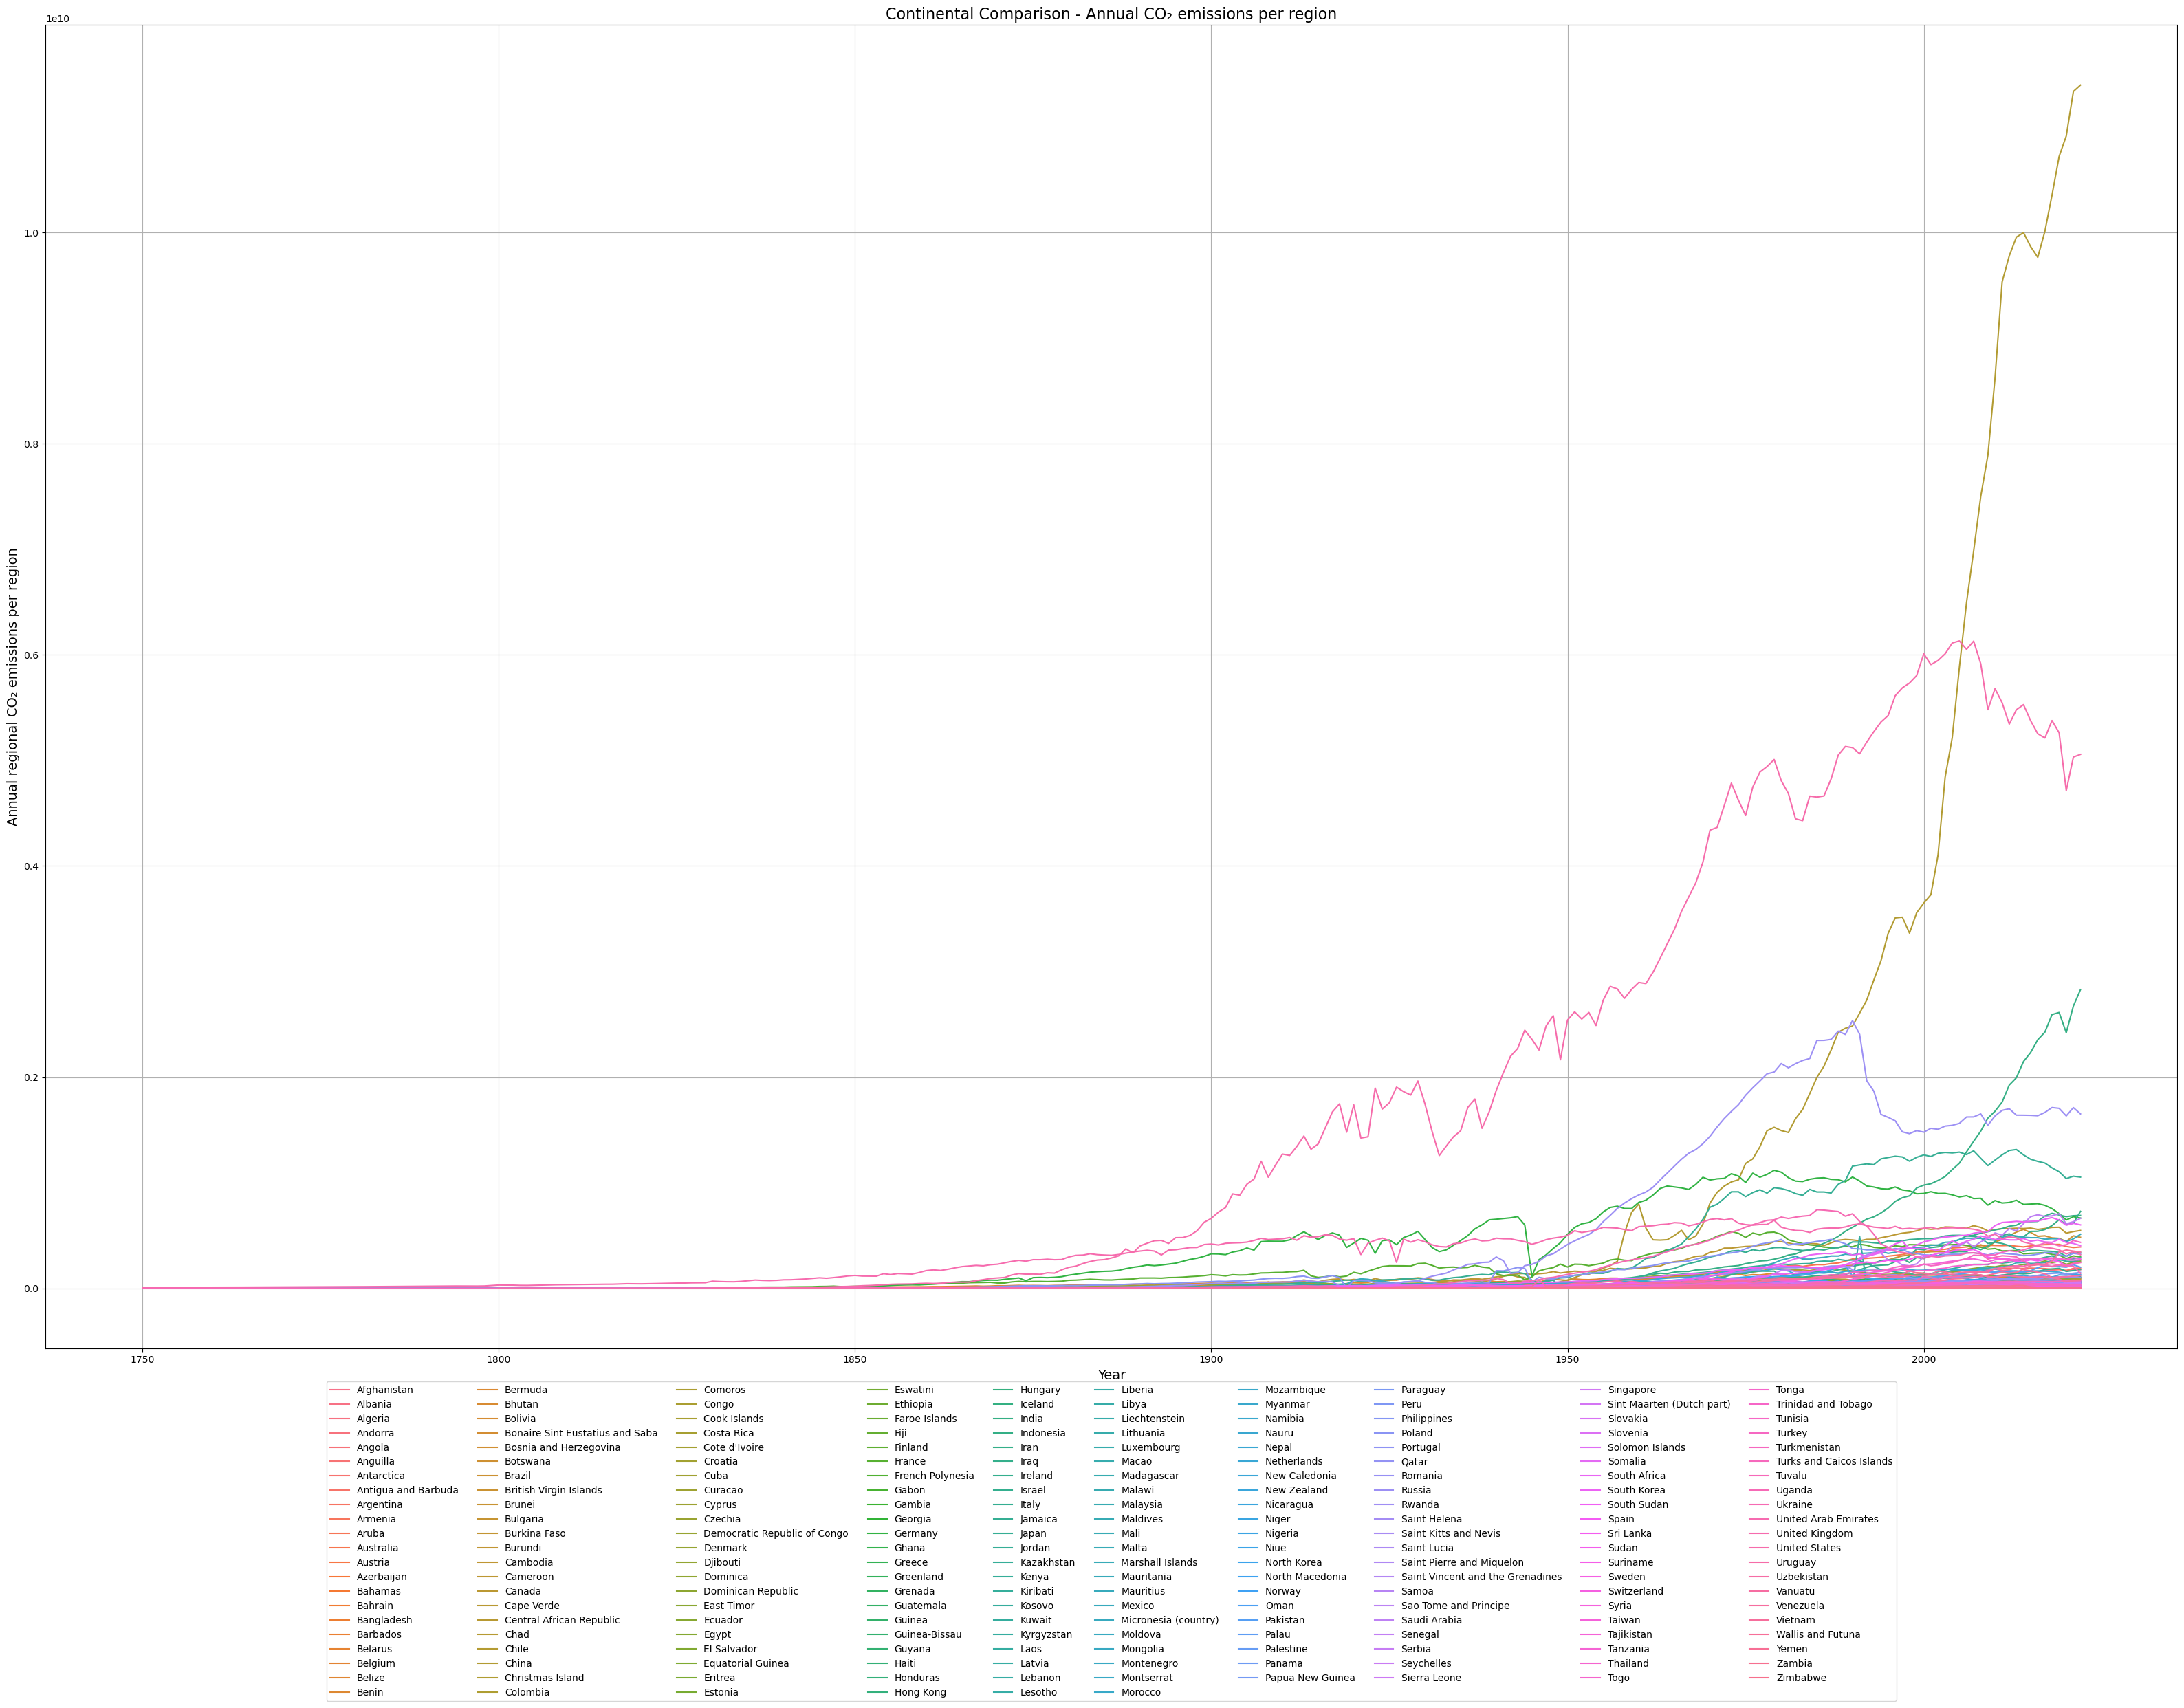

In [13]:
plt.figure(figsize=(40,25))
sns.lineplot(x='Year', y='Emissions', data=country_coemissions, hue='Entity')
plt.grid(True)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Annual regional CO₂ emissions per region', fontsize=14)
plt.title('Continental Comparison - Annual CO₂ emissions per region', fontsize=16)
plt.legend(bbox_to_anchor =(0.5,-0.27), loc='lower center', ncol=10)
plt.show()

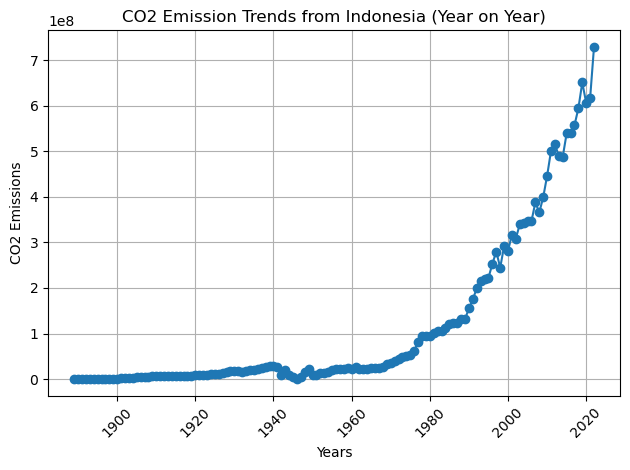

In [14]:
# Menyaring data hanya untuk entitas Indonesia
df_indonesia = co_emissions[co_emissions['Entity'] == 'Indonesia']

# Menyaring data hanya untuk tahun-tahun hingga 2022
df_indonesia = df_indonesia[df_indonesia['Year'] <= 2022]

# Mengurutkan data berdasarkan tahun
df_indonesia = df_indonesia.sort_values(by='Year')

# Plot tren emisi CO2 dari entitas Indonesia
plt.plot(df_indonesia['Year'], df_indonesia['Emissions'], marker='o', linestyle='-')
plt.title('CO2 Emission Trends from Indonesia (Year on Year)')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# Analisis regresi sederhana
X = df_indonesia[['Year']]
y = df_indonesia['Emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) dari regresi sederhana:", mse)

# Model ARIMA
model = ARIMA(df_indonesia['Emissions'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)
print("Prediksi emisi CO2 untuk 5 tahun mendatang:", forecast)

Mean Squared Error (MSE) dari regresi sederhana: 7724565133834163.0
Prediksi emisi CO2 untuk 5 tahun mendatang: 134    7.488668e+08
135    7.153046e+08
136    7.459269e+08
137    8.206623e+08
138    8.226714e+08
Name: predicted_mean, dtype: float64


c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


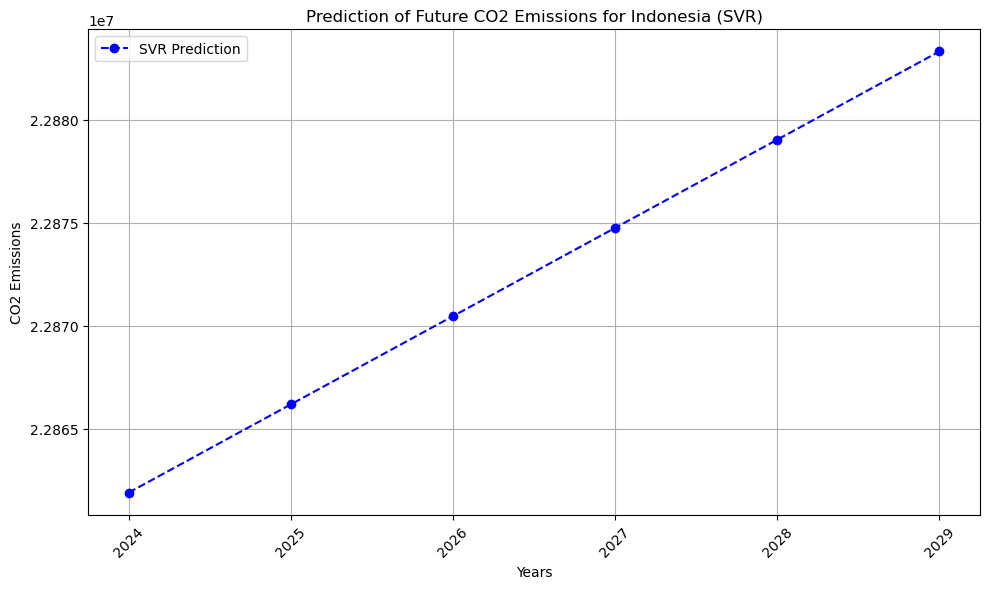

In [16]:
# Membuat model SVM Regresi
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X, y)

# Membuat DataFrame untuk tahun-tahun mendatang
years_future = np.arange(2024, 2030).reshape(-1, 1)
predictions_future = svm_regressor.predict(years_future)

# Plot prediksi emisi CO2 untuk tahun-tahun mendatang
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(years_future, predictions_future, label='SVR Prediction', marker='o', linestyle='--', color='blue')
plt.title('Prediction of Future CO2 Emissions for Indonesia (SVR)')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


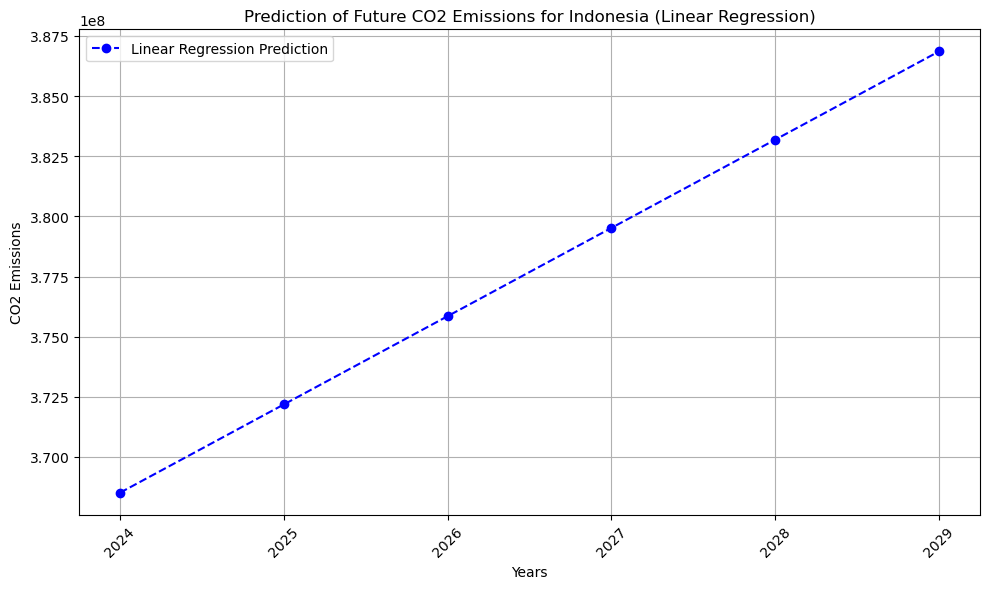

In [17]:
# Membuat model regresi linear
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Membuat prediksi untuk tahun-tahun mendatang
years_future = np.arange(2024, 2030).reshape(-1, 1)
predictions_linear = linear_regressor.predict(years_future)

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(years_future, predictions_linear, label='Linear Regression Prediction', marker='o', linestyle='--', color='blue')
plt.title('Prediction of Future CO2 Emissions for Indonesia (Linear Regression)')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


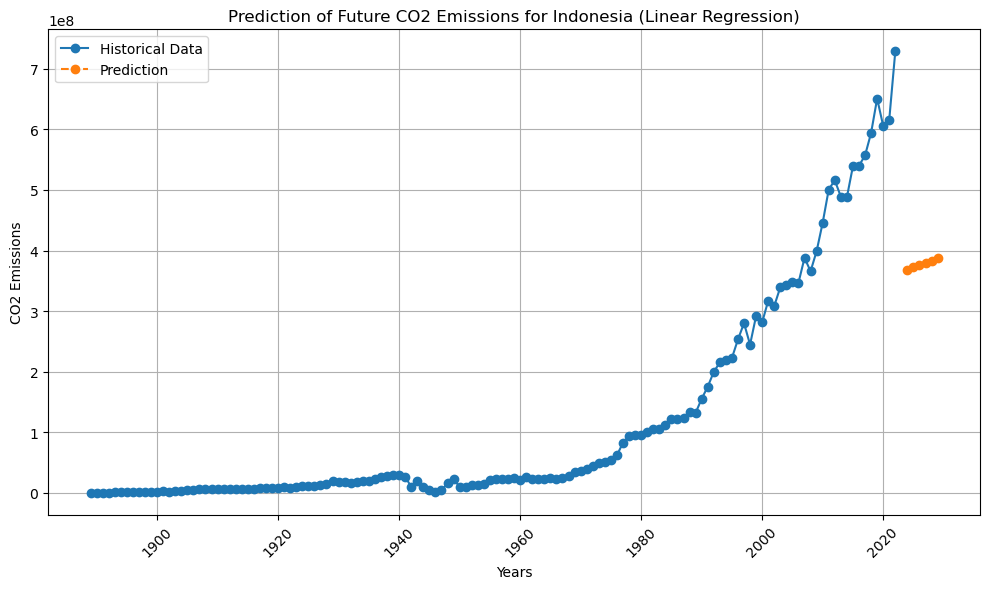

In [18]:
# Membuat model regresi linear
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Membuat prediksi untuk tahun-tahun mendatang
years_future = np.arange(2024, 2030).reshape(-1, 1)
predictions_linear = linear_regressor.predict(years_future)

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(df_indonesia['Year'], df_indonesia['Emissions'], label='Historical Data', marker='o', linestyle='-')
plt.plot(years_future, predictions_linear, label='Prediction', marker='o', linestyle='--')
plt.title('Prediction of Future CO2 Emissions for Indonesia (Linear Regression)')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


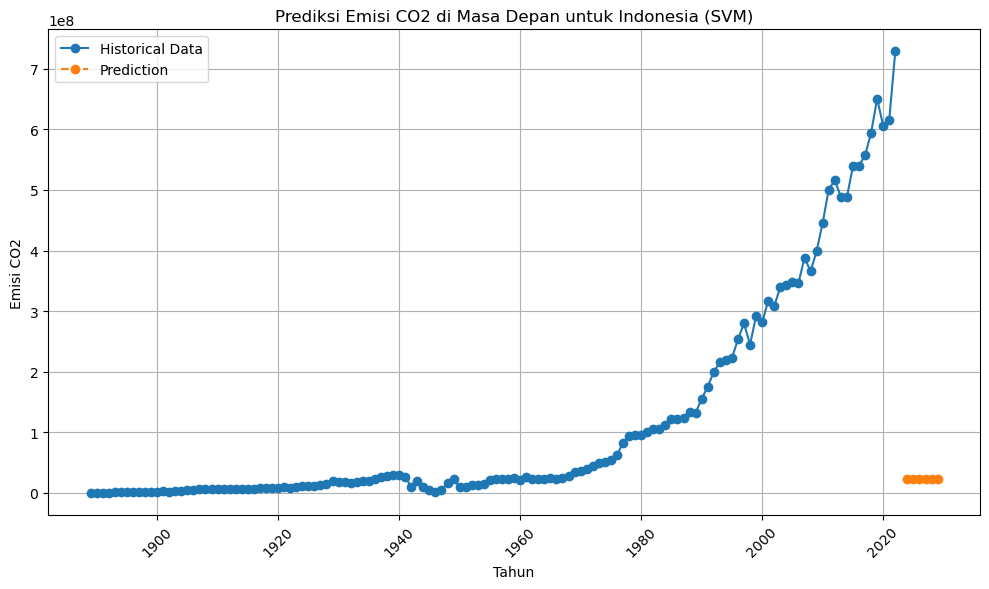

In [55]:
# Membuat model SVM Regresi
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X, y)

# Membuat DataFrame untuk tahun-tahun mendatang
years_future = np.arange(2024, 2030).reshape(-1, 1)
predictions_future = svm_regressor.predict(years_future)

# Plot prediksi emisi CO2 untuk tahun-tahun mendatang
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(df_indonesia['Year'], df_indonesia['Emissions'], label='Historical Data', marker='o', linestyle='-')
plt.plot(years_future, predictions_future, label='Prediction', marker='o', linestyle='--')
plt.title('Prediksi Emisi CO2 di Masa Depan untuk Indonesia (SVM)')
plt.xlabel('Tahun')
plt.ylabel('Emisi CO2')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


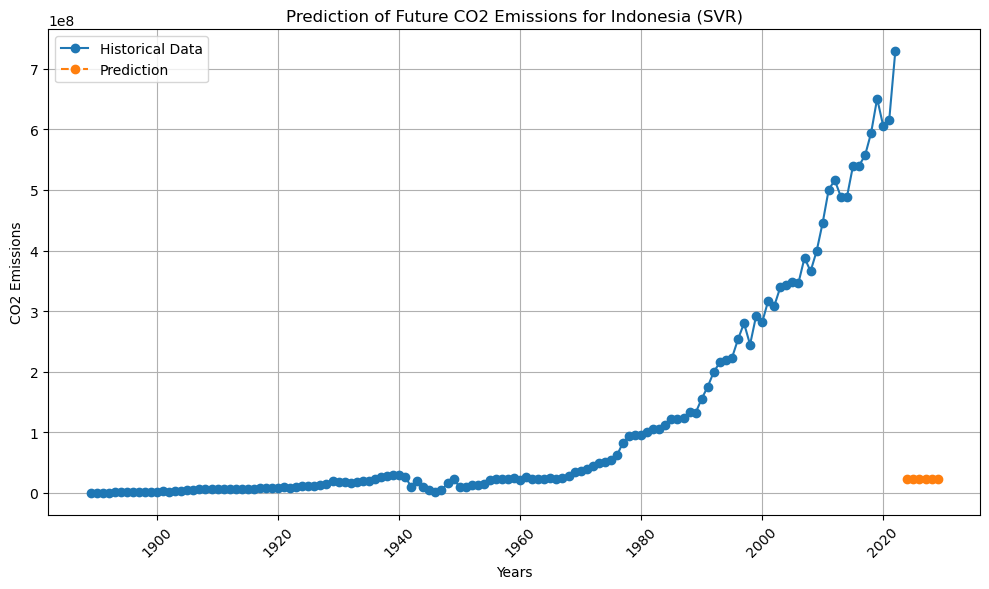

In [53]:
# Membuat model SVR
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X, y)

# Membuat prediksi untuk tahun-tahun mendatang
years_future = np.arange(2024, 2030).reshape(-1, 1)
predictions_svr = svm_regressor.predict(years_future)

# Plot hasil prediksi dan data historis
plt.figure(figsize=(10, 6))

# Plot data historis
plt.plot(df_indonesia['Year'], df_indonesia['Emissions'], label='Historical Data', marker='o', linestyle='-')

# Plot prediksi untuk tahun-tahun mendatang
plt.plot(years_future, predictions_svr, label='Prediction', marker='o', linestyle='--')

plt.title('Prediction of Future CO2 Emissions for Indonesia (SVR)')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
# Membuat model SVR
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X, y)

# Membuat prediksi untuk tahun-tahun mendatang
years_future = np.arange(2024, 2030).reshape(-1, 1)
predictions_svr = svm_regressor.predict(years_future)

# Menampilkan hasil prediksi
print("CO2 Emission Prediction using SVR for the coming years:")
for year, prediction in zip(years_future.flatten(), predictions_svr):
    print(f"{year}: {prediction}")


CO2 Emission Prediction using SVR for the coming years:
2024: 22861883.0
2025: 22866172.0
2026: 22870461.0
2027: 22874750.0
2028: 22879039.0
2029: 22883328.0


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [48]:
# Membuat model regresi linear
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Membuat prediksi untuk tahun-tahun mendatang
years_future = np.arange(2024, 2030).reshape(-1, 1)
predictions_linear = linear_regressor.predict(years_future)

# Menampilkan hasil prediksi
print("CO2 Emission Prediction using Linear Regression for the coming years:")
for year, prediction in zip(years_future.flatten(), predictions_linear):
    print(f"{year}: {prediction}")


CO2 Emission Prediction using Linear Regression for the coming years:
2024: 368517478.2333298
2025: 372185549.79400826
2026: 375853621.35468674
2027: 379521692.9153652
2028: 383189764.4760437
2029: 386857836.0367212


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Menghitung prediksi untuk model regresi linear
predictions_linear = linear_regressor.predict(X_test)

# Menghitung prediksi untuk model SVR
predictions_svr = svm_regressor.predict(X_test)

# Menghitung metrik evaluasi untuk model regresi linear
mse_linear = mean_squared_error(y_test, predictions_linear)
mae_linear = mean_absolute_error(y_test, predictions_linear)
r2_linear = r2_score(y_test, predictions_linear)

# Menghitung metrik evaluasi untuk model SVR
mse_svr = mean_squared_error(y_test, predictions_svr)
mae_svr = mean_absolute_error(y_test, predictions_svr)
r2_svr = r2_score(y_test, predictions_svr)

# Menampilkan hasil perbandingan
print("Perbandingan Metrik Evaluasi antara Regresi Linear dan SVR:")
print("Metrik Evaluasi untuk Regresi Linear:")
print(f"MSE: {mse_linear}")
print(f"MAE: {mae_linear}")
print(f"R-squared: {r2_linear}")
print("\nMetrik Evaluasi untuk SVR:")
print(f"MSE: {mse_svr}")
print(f"MAE: {mae_svr}")
print(f"R-squared: {r2_svr}")


Perbandingan Metrik Evaluasi antara Regresi Linear dan SVR:
Metrik Evaluasi untuk Regresi Linear:
MSE: 7135750076074517.0
MAE: 69943794.79865289
R-squared: 0.5162009490085091

Metrik Evaluasi untuk SVR:
MSE: 1.7399305818344798e+16
MAE: 65938417.98888889
R-squared: -0.17966122034597376


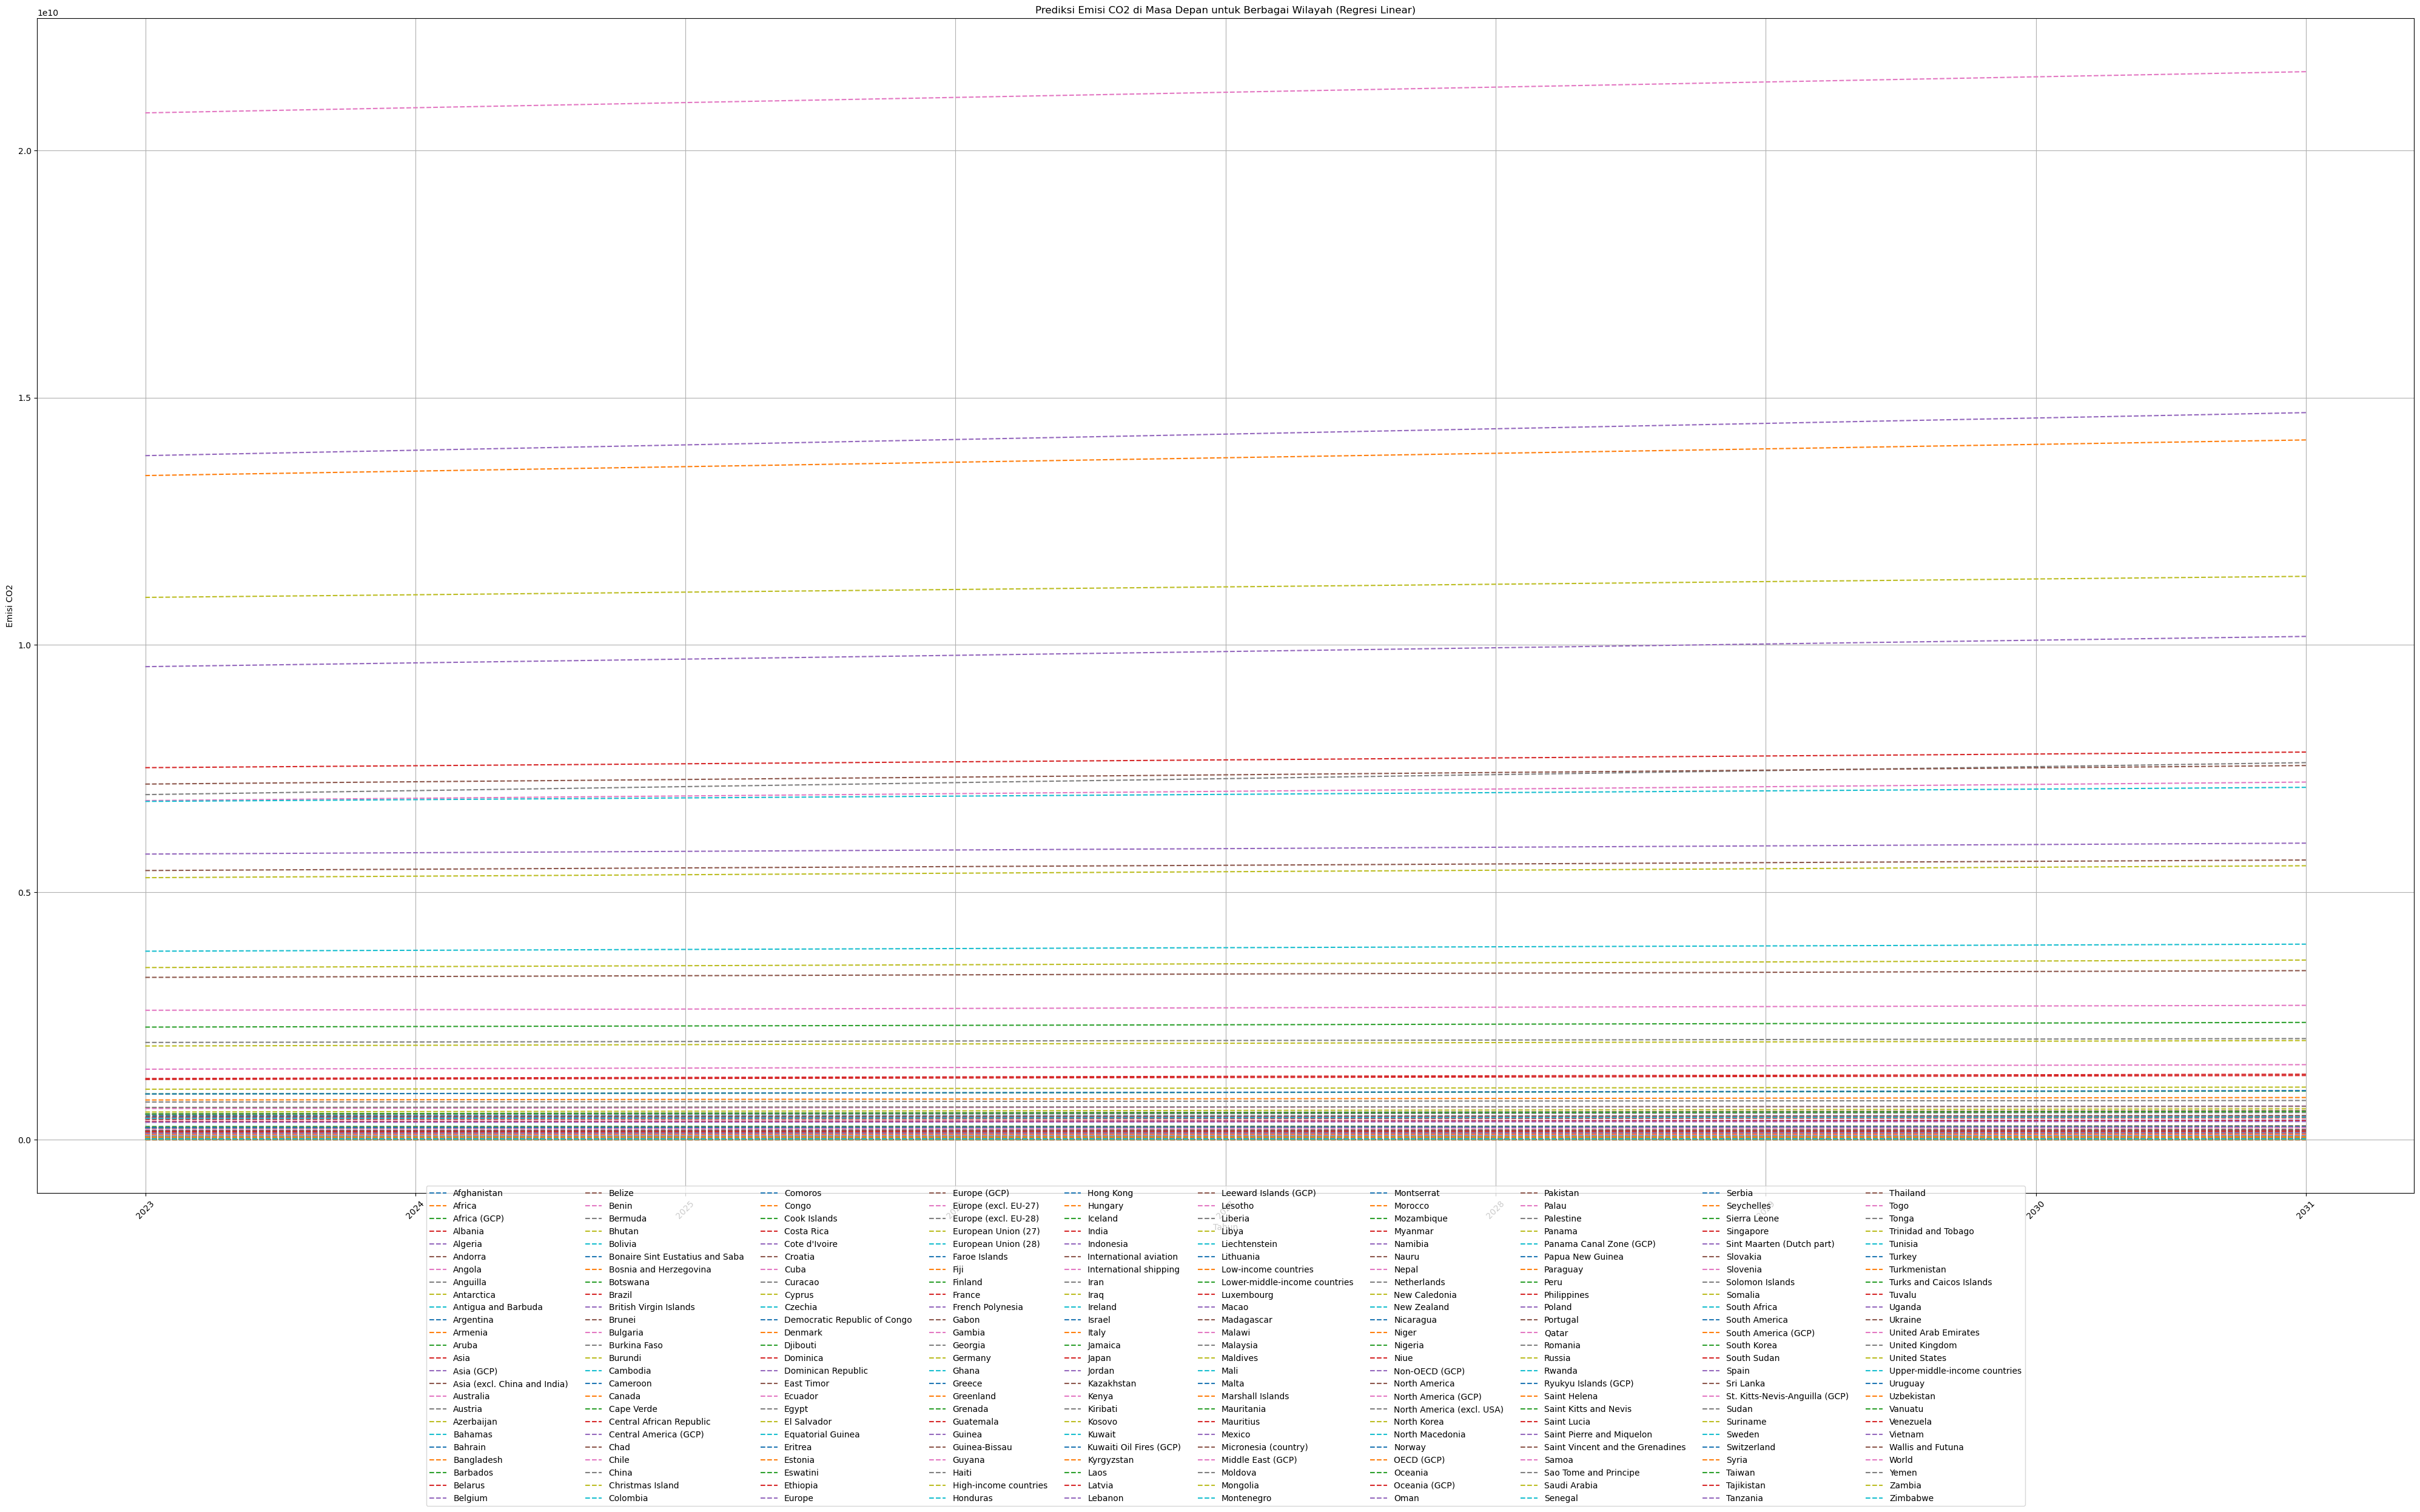

In [39]:
import seaborn as sns

# Inisialisasi plot
plt.figure(figsize=(40, 25))

# Loop melalui setiap area
for region in co_emissions['Entity'].unique():
    # Filter data untuk area saat ini
    df_region = co_emissions[co_emissions['Entity'] == region]
    
    # Persiapan fitur dan target
    X_region = df_region[['Year']].values
    y_region = df_region['Emissions'].values
    
    # Membuat model regresi linear untuk area saat ini
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_region, y_region)
    
    # Membuat prediksi untuk tahun-tahun mendatang
    predictions_linear = linear_regressor.predict(years_future)
    
    # Membuat dataframe untuk prediksi
    df_predictions = pd.DataFrame({'Year': years_future.flatten(), 'Predicted Emissions': predictions_linear})
    
    # Plot hasil prediksi untuk area saat ini
    sns.lineplot(x='Year', y='Predicted Emissions', data=df_predictions, label=region, linestyle='--')

# Menambahkan label dan judul
plt.title('Prediksi Emisi CO2 di Masa Depan untuk Berbagai Wilayah (Regresi Linear)')
plt.xlabel('Tahun')
plt.ylabel('Emisi CO2')
plt.legend(bbox_to_anchor=(0.5, -0.27), loc='lower center', ncol=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
